## What is TensorFlow?
### Tensor is a MultiDimensional Array
### Flow is a graph of operations

#### A popular open source library for deep learning and machine learning
#### Developed by Google Brain Team and Released in 2015
#### Used mainly for classification, perception, understanding, discovering, prediction, and creation

#### TensorFlow 
#### 1. Parallelism
#### 2. Distributed Execution
#### 3. Compilation
#### 4. Portability: You can build a dataflow graph in Python, save it, and run it in C++ 

#### Why TensorFlow
#### 1. Flexibility
#### 2. Parallel Computation
#### 3. Multiple Environment Friendly
#### 4. Large Community

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.shape

(768, 9)

In [5]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
X = df_diab.drop(['Outcome'], axis=1)
y = df_diab['Outcome']

In [8]:
np.random.seed(12345)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify = y, 
                                                    test_size = 0.2, # Train dataset is 80%
                                                    random_state = 12345)

In [11]:
X_train.shape

(614, 8)

In [12]:
X_test.shape

(154, 8)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
print(tf.__version__)

2.8.0


In [17]:
# Import the Sequential class which is Sequential API
from tensorflow.keras.models import Sequential

In [18]:
# Dense: Dense Layer which is hidden layer
# Input: Input Layer
from tensorflow.keras.layers import Dense, Input

In [19]:
# Instantiate the model by calling the Sequential 
model = Sequential()  # At this point it has no layer

In [20]:
X_train_scaled.shape[1]
# 8 is the number of columns in the dataset

8

In [21]:
X_test_scaled.shape[1]

8

In [22]:
# Start building the network by adding the layer
# First build the input layer by adding the input layer
model.add(Input(shape=(X_train_scaled.shape[1], ))) # Pass the value as a tuple

In [23]:
# We now continue building the model by adding the layers. 
# We added an input layer whose shape is 8 (i.e. shape of dataset columns) in the form of tuple.
# By provinding the shape 8, the input layer will have 9 features (1 bias is automatically added)

In [24]:
# First hidden layer - 128 neurons, relu activation
model.add(Dense(units=128, 
                activation='relu'
               ))

In [25]:
# Add second hidden layer
model.add(Dense(units=64,
                activation='relu'
               ))

In [26]:
# Add third hidden layer 32, relu activation
model.add(Dense(units=32, 
                activation='relu'
               ))

In [27]:
# Typically number of neurons is 2 to the power of 7 (128), 2 to the power of 6 is 64, 
# and 2 to the power of 5 is 32. 
# Generally, first layer has large number of neurons and then subsequently, the number of layers has less neurons.
# You don't have control over the input or output. 
# You only have control over the number of neurons in the hidden layer. 
# 

In [28]:
# Add the output layer - Sigmoid
model.add(Dense(units=1, 
                activation='sigmoid'
               ))

In [29]:
model.summary() 
# It's a good practice to summarize the model. It will not show you the input layer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 
# Param # is number of connections.  
# 1152 is the number of connections. 9 (input) * 128 (1st hidden layer) = 1152
# 128+1 = 129 (1st Hidden Layer) * 64 (2nd Hidden Layer) = 8256
# 64+1 = 65 (2nd Hidden Layer) * 32 (3rd Hidden Layer) = 2080

In [31]:
print(9*128)
print(129*64)
print(65*32)

1152
8256
2080


In [32]:
1152+8256+2080+33
# 1152 connections are between input layer (9) and first hidden layer
# 8256 connections are between first hidden layer (128+1) and second hidden layer (64)
# 2080 connections are between second hidden layer (64+1) and third hidden layer (32)
# 33 connections are between third hidden layer (32+1) and the output layer (1) i.e. 33*1 = 33

11521

In [33]:
model.compile(optimizer='adam', # Variant of Gradient Descent (adaptive momentum of optimization)
              loss='binary_crossentropy', # Log Loss or Binary Cross Entropy
              metrics=['accuracy']) # Monitor Accuracy

In [34]:
result=model.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), 
                 epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.6546 - accuracy: 0.6107 - val_loss: 0.5691 - val_accuracy: 0.7922
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7622 - val_loss: 0.4783 - val_accuracy: 0.7727
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7720 - val_loss: 0.4443 - val_accuracy: 0.7857
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7785 - val_loss: 0.4354 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7899 - val_loss: 0.4324 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7834 - val_loss: 0.4322 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7932 - val_loss: 0.4368 - val_accuracy: 0.7792
Epoch 8/100


In [35]:
# Here the first accuracy is train accuracy and the second val_accuracy is test accuracy.  
# This is the situation of overfitting because train dataset accuracy is 100% whereas accuracy on test dataset is 70%. 
# There is vast difference. 

In [36]:
history = pd.DataFrame(result.history)

In [37]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.654556,0.610749,0.569137,0.792208
1,0.535888,0.762215,0.478268,0.772727
2,0.483612,0.771987,0.444303,0.785714
3,0.462894,0.778502,0.435410,0.792208
4,0.452907,0.789902,0.432432,0.792208


In [38]:
## The following two graphs shows the situation of overfitting after 8th Epochs 

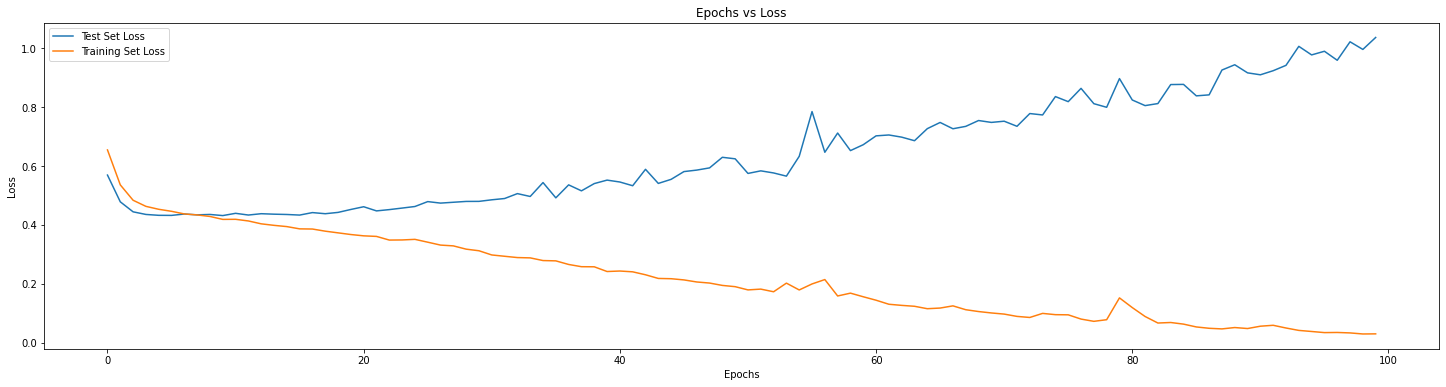

In [39]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

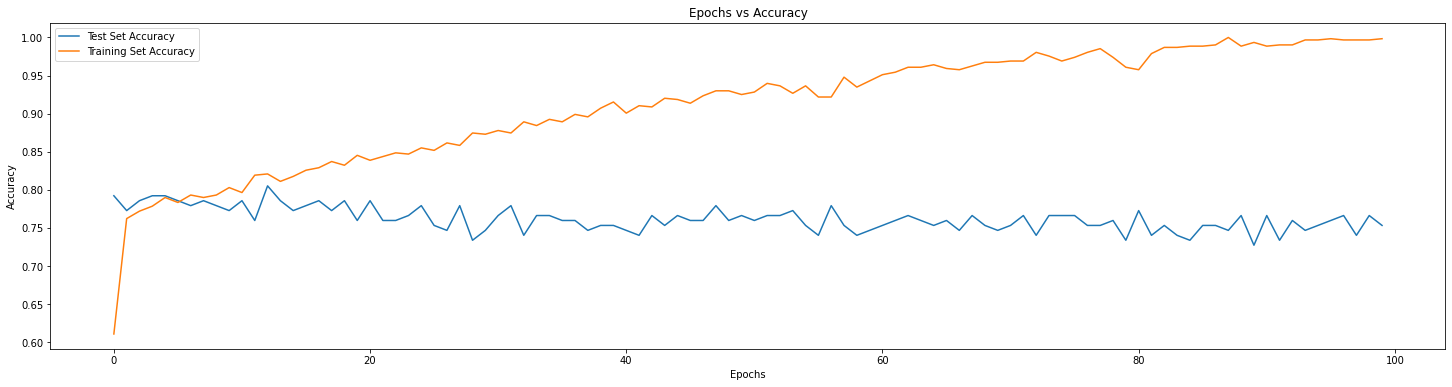

In [40]:
plt.figure(figsize = (25,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# As this graph shows that after 6th or 7th Epochs, if we have stopped then we would have got good response.  
# This is called Early Stopping. 

## Implement Early Stopping

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
tf.random.set_seed(12345)

In [44]:
model_es = Sequential()

In [45]:
model_es.add(Input(shape = (X_train_scaled.shape[1], )))

In [46]:
model_es.add(Dense(units= 128, activation = 'relu'))

In [47]:
model_es.add(Dense(units= 64, activation = 'relu'))

In [48]:
model_es.add(Dense(units= 32, activation = 'relu'))

In [49]:
model_es.add(Dense(units= 1, activation = 'sigmoid'))

In [50]:
model_es.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_es.compile(optimizer='adam',
                 loss='binary_crossentropy', 
                 metrics=['accuracy']) # Monitor Accuracy

In [52]:
es= EarlyStopping(monitor='val_accuracy',
                  patience=4)

In [53]:
result_es=model_es.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), 
                 epochs=100,
                 callbacks=[es]
                 )

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.5866 - accuracy: 0.6954 - val_loss: 0.5023 - val_accuracy: 0.7468
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7638 - val_loss: 0.4486 - val_accuracy: 0.7792
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7883 - val_loss: 0.4322 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7818 - val_loss: 0.4403 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.7932 - val_loss: 0.4364 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4410 - accuracy: 0.7899 - val_loss: 0.4399 - val_accuracy: 0.7597
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7980 - val_loss: 0.4297 - val_accuracy: 0.7922


In [54]:
history_es = pd.DataFrame(result_es.history)

In [55]:
history_es.head()

,loss,accuracy,val_loss,val_accuracy
0,0.586588,0.695440,0.502329,0.746753
1,0.488123,0.763844,0.448598,0.779221
2,0.463845,0.788274,0.432157,0.792208
3,0.454007,0.781759,0.440272,0.792208
4,0.443180,0.793160,0.436374,0.779221


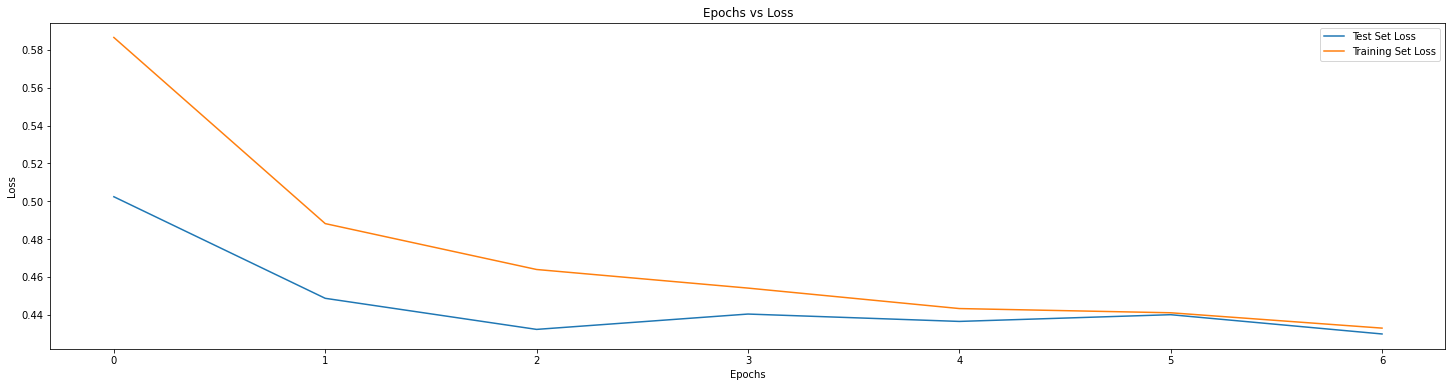

In [56]:
plt.figure(figsize = (25,6))
plt.plot(history_es.val_loss, label='Test Set Loss')
plt.plot(history_es.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

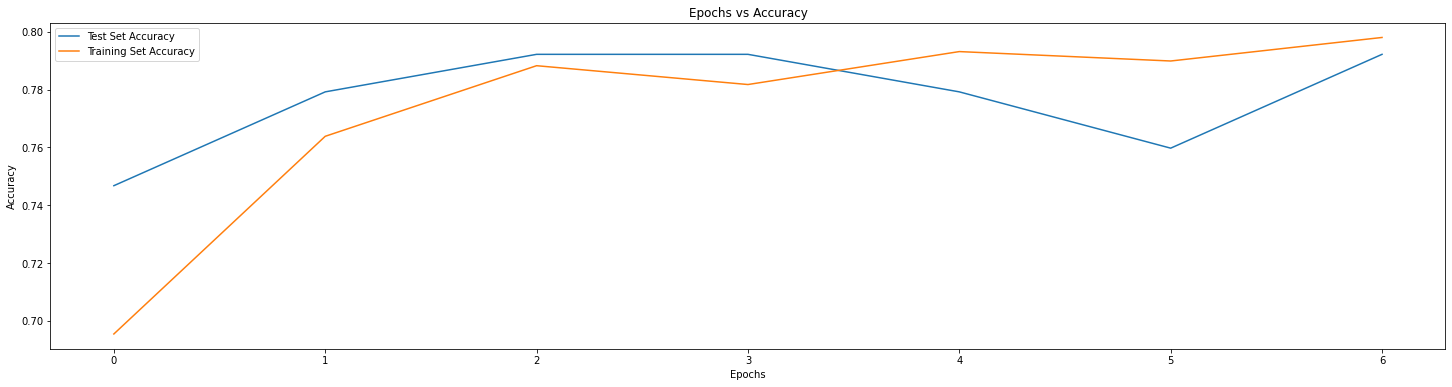

In [57]:
plt.figure(figsize = (25,6))
plt.plot(history_es.val_accuracy, label='Test Set Accuracy')
plt.plot(history_es.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Implementing L1 Regularization

In [58]:
model_reg = Sequential()

In [59]:
model_reg.add(Input(shape = (X_train_scaled.shape[1], )))

In [60]:
model_reg.add(Dense(units=128,
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.L1()
                   )
             )

In [61]:
model_reg.add(Dense(units=64, activation='relu'))
model_reg.add(Dense(units=32, activation='relu'))
model_reg.add(Dense(units=1, activation='sigmoid'))

In [62]:
model_reg.compile(optimizer='adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [63]:
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [64]:
result_reg=model_reg.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), 
                 epochs=100
                 )

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 1.6713 - accuracy: 0.6433 - val_loss: 1.5135 - val_accuracy: 0.7597
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.4168 - accuracy: 0.7638 - val_loss: 1.2770 - val_accuracy: 0.7922
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2097 - accuracy: 0.7769 - val_loss: 1.0909 - val_accuracy: 0.7857
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0600 - accuracy: 0.7720 - val_loss: 0.9653 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9422 - accuracy: 0.7736 - val_loss: 0.8621 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.7785 - val_loss: 0.7729 - val_accuracy: 0.7922
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7678 - accuracy: 0.7801 - val_loss: 0.6970 - val_accuracy: 0.7922
Epoch 8/100
2

In [65]:
history_reg = pd.DataFrame(result_reg.history)

In [66]:
history_reg.head()

,loss,accuracy,val_loss,val_accuracy
0,1.671348,0.643322,1.513492,0.759740
1,1.416820,0.763844,1.277030,0.792208
2,1.209675,0.776873,1.090852,0.785714
3,1.059969,0.771987,0.965339,0.779221
4,0.942160,0.773616,0.862080,0.792208


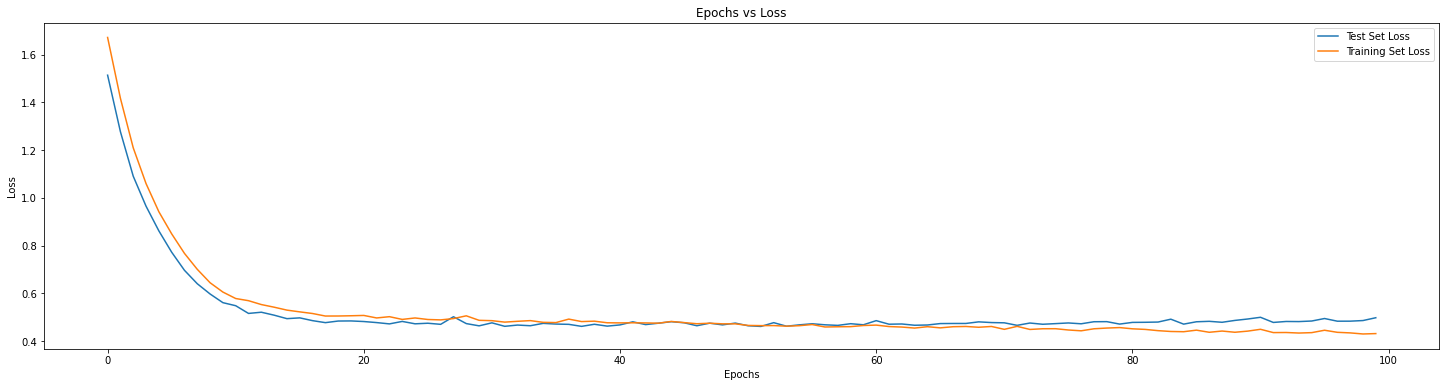

In [67]:
plt.figure(figsize = (25,6))
plt.plot(history_reg.val_loss, label='Test Set Loss')
plt.plot(history_reg.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

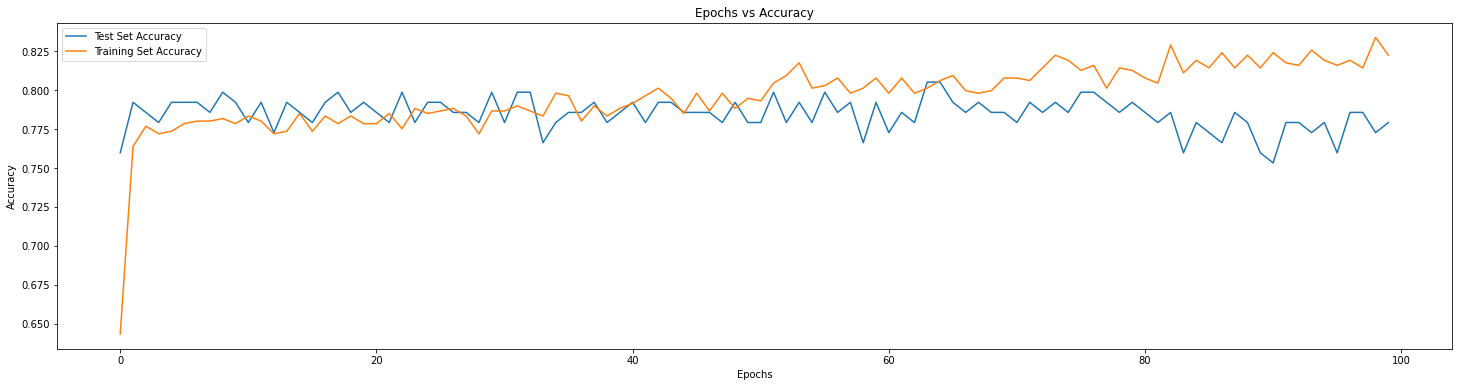

In [68]:
plt.figure(figsize = (25,6))
plt.plot(history_reg.val_accuracy, label='Test Set Accuracy')
plt.plot(history_reg.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Implement Dropout Regularization

### Dropout Regularization is used to tackle overfitting problem by randomly droppping neurons which reduces biad due to over-relying on one input.  It also improves processing time. 

In [69]:
from tensorflow.keras.layers import Dropout

In [70]:
model_drp = Sequential()

In [71]:
model_drp.add(Input(shape = (X_train_scaled.shape[1], )))

In [72]:
model_drp.add(Dense(units=128, activation='relu'))

In [73]:
model_drp.add(Dropout(0.5))

In [74]:
model_drp.add(Dense(units=64, activation='relu'))
model_drp.add(Dropout(0.3))

In [75]:
model_drp.add(Dense(units=32, activation='relu'))
model_drp.add(Dropout(0.2))

In [76]:
model_drp.add(Dense(units=1, activation='sigmoid'))

In [77]:
model_drp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [78]:
model_drp.compile(optimizer='adam', 
                   loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [79]:
result_drp=model_drp.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), epochs=100
                 )

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.6743 - accuracy: 0.5879 - val_loss: 0.6162 - val_accuracy: 0.6753
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6840 - val_loss: 0.5567 - val_accuracy: 0.7468
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.6922 - val_loss: 0.5051 - val_accuracy: 0.7857
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7410 - val_loss: 0.4779 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7492 - val_loss: 0.4622 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7313 - val_loss: 0.4542 - val_accuracy: 0.7792
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7524 - val_loss: 0.4468 - val_accuracy: 0.7922
Epoch 8/100
2

In [80]:
history_drp = pd.DataFrame(result_drp.history)

In [81]:
history_drp.head()

,loss,accuracy,val_loss,val_accuracy
0,0.674343,0.587948,0.616189,0.675325
1,0.608511,0.684039,0.556677,0.746753
2,0.575097,0.692182,0.505113,0.785714
3,0.527968,0.741042,0.477934,0.792208
4,0.518058,0.749186,0.462209,0.785714


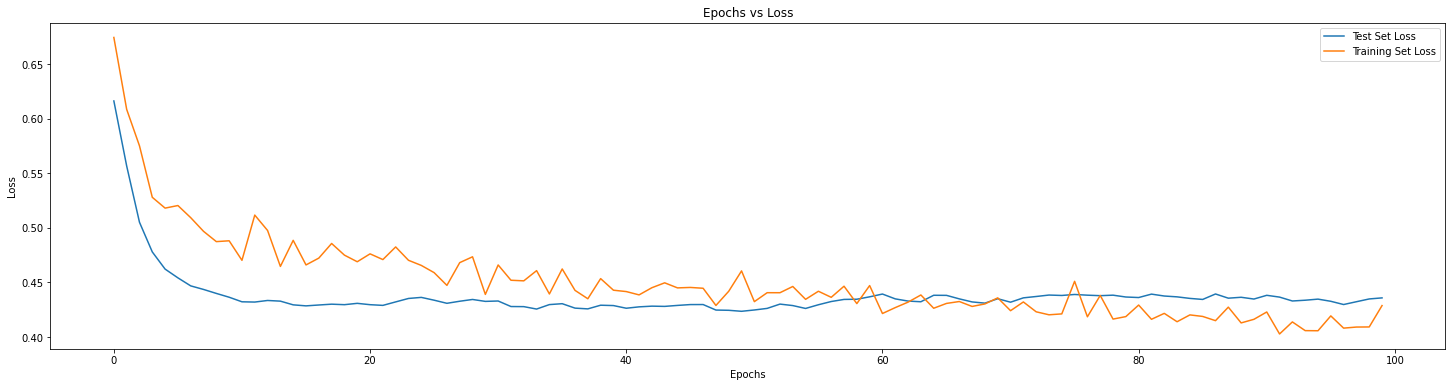

In [82]:
plt.figure(figsize = (25,6))
plt.plot(history_drp.val_loss, label='Test Set Loss')
plt.plot(history_drp.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

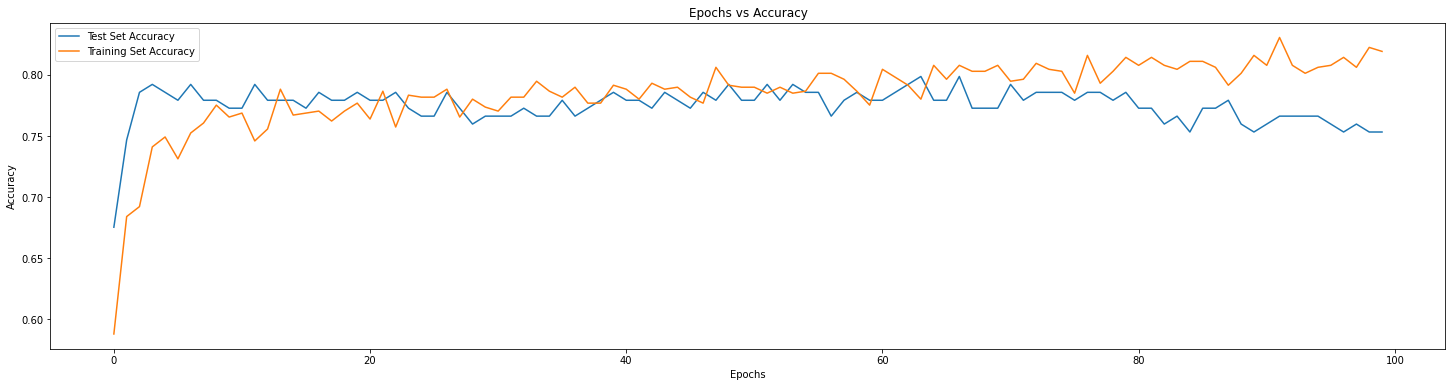

In [83]:
plt.figure(figsize = (25,6))
plt.plot(history_drp.val_accuracy, label='Test Set Accuracy')
plt.plot(history_drp.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Implement L1L2 Regularization

In [84]:
model_L1L2 = Sequential()

In [85]:
model_L1L2.add(Input(shape = (X_train_scaled.shape[1], )))

In [86]:
model_L1L2.add(Dense(units=128,
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.L1L2()
                   )
             )

In [87]:
model_L1L2.add(Dense(units=64, activation='relu'))
model_L1L2.add(Dense(units=32, activation='relu'))
model_L1L2.add(Dense(units=1, activation='sigmoid'))

In [88]:
model_L1L2.compile(optimizer='adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [89]:
model_L1L2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1152      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [90]:
result_L1L2=model_L1L2.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), 
                 epochs=100
                 )

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.6617 - accuracy: 0.6140 - val_loss: 0.5818 - val_accuracy: 0.7532
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7508 - val_loss: 0.4876 - val_accuracy: 0.7662
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7736 - val_loss: 0.4410 - val_accuracy: 0.7987
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7834 - val_loss: 0.4338 - val_accuracy: 0.7727
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7899 - val_loss: 0.4290 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7801 - val_loss: 0.4351 - val_accuracy: 0.7987
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7932 - val_loss: 0.4243 - val_accuracy: 0.7857
Epoch 8/100
2

In [91]:
history_L1L2 = pd.DataFrame(result_L1L2.history)

In [92]:
history_L1L2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.661701,0.614007,0.581805,0.753247
1,0.539577,0.750814,0.487621,0.766234
2,0.482000,0.773616,0.440984,0.798701
3,0.460338,0.783388,0.433798,0.772727
4,0.448108,0.789902,0.429011,0.792208


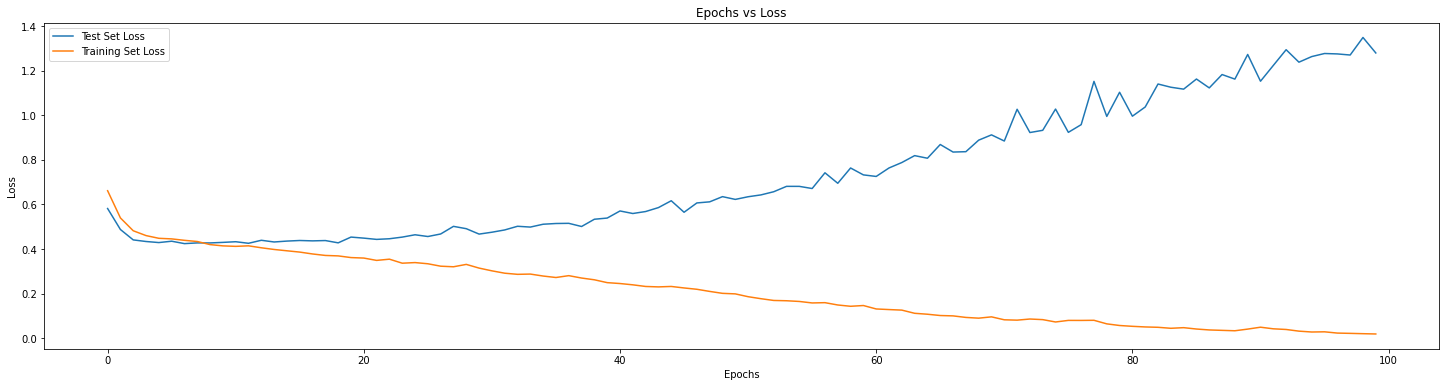

In [93]:
plt.figure(figsize = (25,6))
plt.plot(history_L1L2.val_loss, label='Test Set Loss')
plt.plot(history_L1L2.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

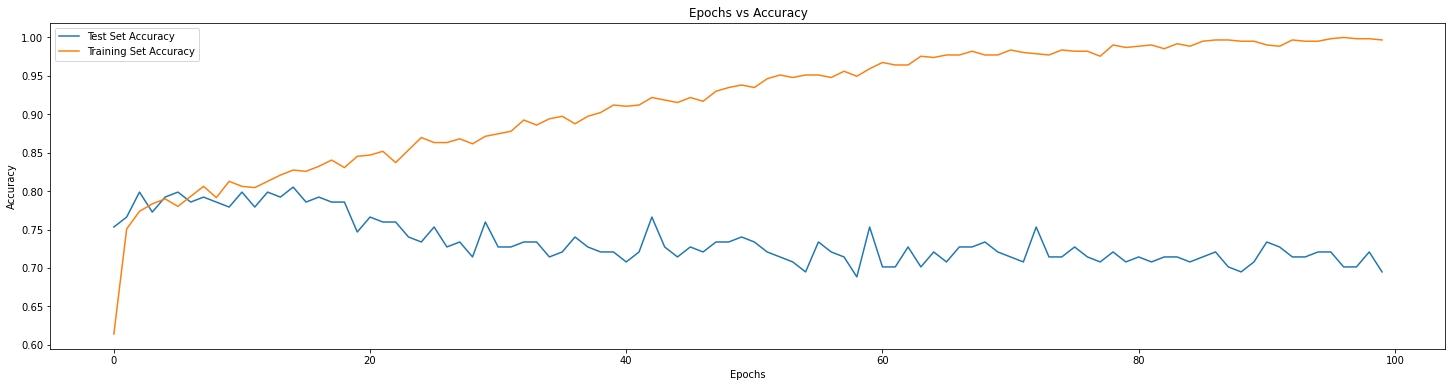

In [94]:
plt.figure(figsize = (25,6))
plt.plot(history_L1L2.val_accuracy, label='Test Set Accuracy')
plt.plot(history_L1L2.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Mean Squared Error (MSE) and Mean Absolute Error (MAE)
### Mean Absolute Error (MAE) is usually better, particularly if there is outlier because Mean Squared Error (MSE) will amplify the error due to outlier.  Say the salary of a CEO is compared with mean value then the difference will be amplified when MSE will be used.  In such situations MAE is preferred because the difference will not be amplified. 